In [1]:
function c_calc_step_md(dstep, N, mass, posx, posy, velx, vely)
 ccall((:calc_step_md, "./libmd.so"), Void, (Cint,Cint,Ptr{Cdouble}, Ptr{Cdouble}, Ptr{Cdouble}, Ptr{Cdouble}, Ptr{Cdouble}),
    dstep, N, mass, posx, posy, velx, vely)
end

c_calc_step_md (generic function with 1 method)

In [7]:
using Plots
pyplot(legend=false)

function plot_circle!(px,py,r; c=:black)
    pts = Plots.partialcircle(0,2*3.1415,100,r)
    x,y = Plots.unzip(pts)
    x += px
    y += py
    pts = collect(zip(x,y))
    plot!(Shape(x,y), xlim=(0.0,10.0), ylim=(0.0,10.0),c=c)
end

plot_circle! (generic function with 1 method)

In [14]:
function init_cond(;V0 = 1.0, density=0.5)
    nx = 10 :: Int
    ny = 10 :: Int
    
    mass = Float64[]
    posx = Float64[]
    posy = Float64[]
    velx = Float64[]
    vely = Float64[]
    
    density = 0.5
    s = (density*0.25)^(-0.5)
    is = Int(floor(10.0/s))
    for i = 0:is-1
        for j = 0:is-1
            push!(mass, 1.0)
            
            phi = 2.0 * rand() * pi
            vx = V0 * cos(phi)
            vy = V0 * sin(phi)

            push!(velx, vx)
            push!(vely, vy)

            px = i*s
            py = j*s
            push!(posx, px)
            push!(posy, py)
        end
    end
    
    return mass,posx,posy,velx,vely
end

init_cond (generic function with 1 method)

In [15]:
function plot_particles(mass,posx,posy,velx,vely)
    plot()
    N = length(posx)
    for i = 1:N
        plot_circle!(posx[i], posy[i], 0.1)# mass[i])
    end
    plot!()
end

plot_particles (generic function with 1 method)

In [16]:
mass,posx,posy,velx,vely = init_cond(density=1.5)
N = length(mass)

@gif for i = 1:1000
    c_calc_step_md(10, N, mass, posx, posy, velx, vely)
    plot_particles(mass,posx,posy,velx,vely)
end

[0] 0.000000, 0.000000 / 0.587013, -0.809577
[1] 0.000000, 2.828427 / 0.107251, 0.994232
[2] 0.000000, 5.656854 / -0.286833, 0.957981
[3] 2.828427, 0.000000 / -0.024774, -0.999693
[4] 2.828427, 2.828427 / 0.932458, 0.361279
[5] 2.828427, 5.656854 / 0.666325, -0.745662
[6] 5.656854, 0.000000 / 0.905622, 0.424086
[7] 5.656854, 2.828427 / -0.961919, -0.273334
[8] 5.656854, 5.656854 / -0.782384, -0.622797
[0] 0.587013, 9.190423 / 0.587013, -0.809577
[1] 0.107251, 3.822659 / 0.107251, 0.994232
[2] 9.713167, 6.614835 / -0.286833, 0.957981
[3] 2.803654, 9.000307 / -0.024774, -0.999693
[4] 3.832577, 3.184262 / 0.267357, 1.028514
[5] 3.539481, 4.906913 / 1.014404, -0.787674
[6] 6.562476, 0.424086 / 0.905622, 0.424086
[7] 4.622308, 2.567392 / -0.306773, -0.874149
[8] 4.830675, 5.031482 / -1.120509, -0.647204
[0] 1.227100, 8.366003 / 0.804380, -0.892238
[1] 0.214503, 4.816891 / 0.107251, 0.994232
[2] 9.432773, 7.577317 / -0.238298, 0.988462
[3] 2.719367, 8.010955 / -0.290676, -0.947514
[4] 4.4385

INFO: Saved animation to /home/maruishi/Workspace/particle/tmp.gif


Plots.AnimatedGif("/home/maruishi/Workspace/particle/tmp.gif")

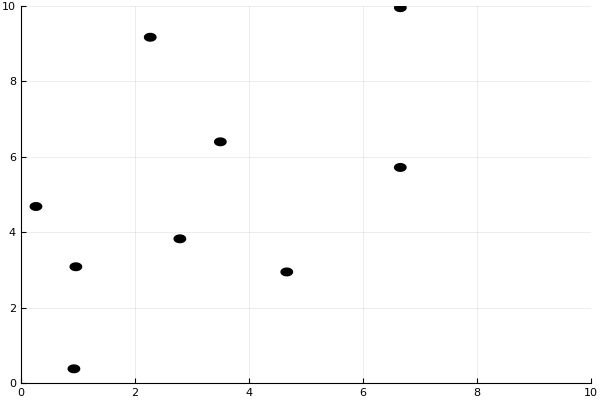

In [11]:
plot_particles(mass,posx,posy,velx,vely)